In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import boto3
from sagemaker import get_execution_role

In [3]:
#from google.colab import files
#upload = files.upload()

In [4]:
#df=pd.read_csv('hour.csv')

In [80]:
role = get_execution_role()
bucket = 'machine-learning-uni'
data_location = 's3://{}/{}'.format(bucket, 'week5/bikeshare/hour.csv')

In [81]:
df = pd.read_csv(data_location)

In [82]:
df 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [83]:
df_clean = df.drop(["instant", "yr", "dteday","casual","registered"],axis=1) 
df_clean.describe() 

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [84]:
df_clean = df_clean.groupby(['season','mnth','hr','holiday','weekday','workingday','weathersit']).agg({'temp': ['mean'],'temp': ['mean'],'atemp': ['mean'], 'hum': ['mean'], 'windspeed': ['mean'],'cnt': ['mean']}).reset_index()
X=df_clean.drop(columns="cnt",axis=1)
y=df_clean['cnt']


/tmp/ipykernel_15/207145831.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X=df_clean.drop(columns="cnt",axis=1)


In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=2)

In [13]:
# Fit the model over the training data
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', cache_size=1000)
regressor.fit(X_train, np.ravel(y_train, order="C"))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


SVR(cache_size=1000)

In [14]:
regressor.score(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.3058271034908183

In [15]:
regressor.score(X_test, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.3245462617167195

In [16]:
# 1. Single Layer Perceptron regressor with one hidden layer
slp = MLPRegressor(hidden_layer_sizes=(200,), activation='relu', solver='adam', max_iter=1000)
slp.fit(X_train, np.ravel(y_train, order="C"))
y_pred = slp.predict(X_test)
rscore = slp.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [17]:
print("Score: %.4f" % rscore)
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)
print("MAPE: %.2f" % mape)

Score: 0.6622
MSE: 8810.3513
MAE: 64.9862
MAPE: 1.28


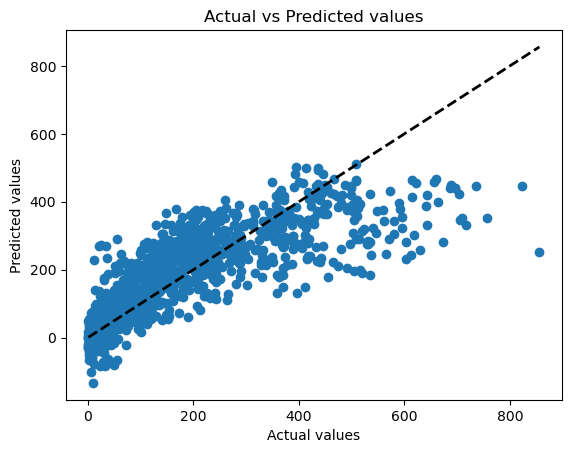

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [19]:
# 2. Single Layer Perceptron regressor with one hidden layer, using tanh and sgd
slp = MLPRegressor(hidden_layer_sizes=(350,), activation='tanh', solver='adam', max_iter=1000)
slp.fit(X_train, np.ravel(y_train, order="C"))
y_pred = slp.predict(X_test)
rscore = slp.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [20]:
print("Score: %.4f" % rscore)
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)
print("MAPE: %.2f" % mape)

Score: 0.8310
MSE: 4407.9234
MAE: 44.6384
MAPE: 0.81


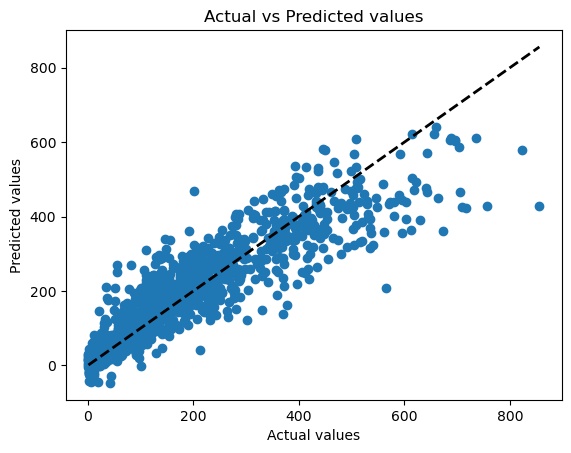

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [22]:
# 3. FeedForward Multi Layer Perceptron regressor with two hidden layer
mlp = MLPRegressor(hidden_layer_sizes=(50,50), activation='tanh', solver='adam', max_iter=1000)
mlp.fit(X_train, np.ravel(y_train, order="C"))
y_pred = mlp.predict(X_test)
rscore = mlp.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [23]:
print("Score: %.4f" % rscore)
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)
print("MAPE: %.2f" % mape)

Score: 0.8897
MSE: 2877.3045
MAE: 35.3771
MAPE: 0.55


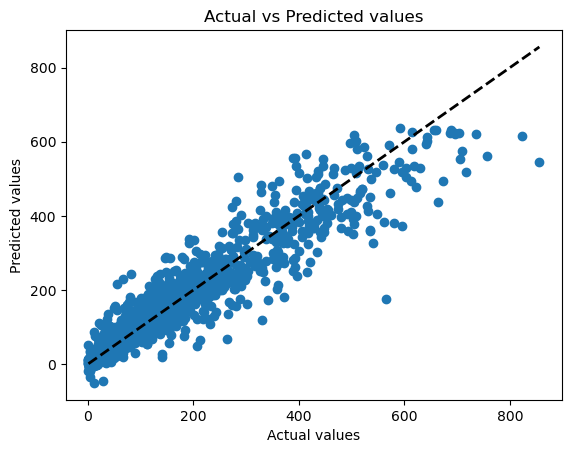

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [25]:
# 4. FeedForward Multi Layer Perceptron regressor with tree hidden layer
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), activation='tanh', solver='adam', max_iter=1000)
mlp.fit(X_train, np.ravel(y_train, order="C"))
y_pred = mlp.predict(X_test)
rscore = mlp.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [26]:
print("Score: %.4f" % rscore)
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)
print("MAPE: %.2f" % mape)

Score: 0.8862
MSE: 2969.1453
MAE: 35.3408
MAPE: 0.45


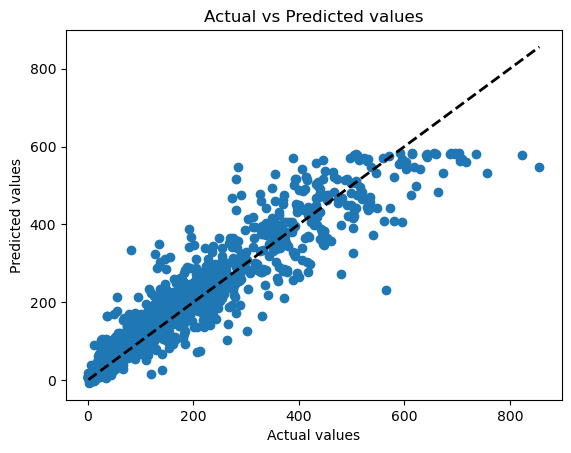

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(scaled_X, y, test_size=0.2, random_state=2)

# 5. BackPropagation Multi Layer Perceptron regressor with tree hidden layer
mlp = MLPRegressor()
parameters = {
    'hidden_layer_sizes': [(64,64,64), (96,96,96), (128,128,128)],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'max_iter': [7000, 8000, 10000],
    'learning_rate_init': [0.0001, 0.0005, 0.001]
}
grid_search = GridSearchCV(mlp, parameters, n_jobs=-1, cv=2)
grid_search.fit(X_train, np.ravel(y_train, order="C"))
y_pred = grid_search.predict(X_test)

rscore = grid_search.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [104]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

print("Score: %.4f" % rscore)
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)
print("MAPE: %.2f" % mape)

{'activation': 'tanh', 'hidden_layer_sizes': (128, 128, 128), 'learning_rate_init': 0.0001, 'max_iter': 8000, 'solver': 'sgd'}
MLPRegressor(activation='tanh', hidden_layer_sizes=(128, 128, 128),
             learning_rate_init=0.0001, max_iter=8000, solver='sgd')
Score: 0.8979
MSE: 2662.9909
MAE: 31.6281
MAPE: 0.37


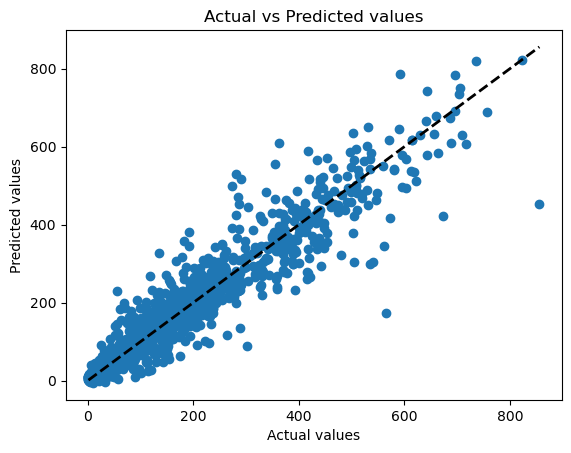

In [106]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Conclusions
- Best model based on R2 score is: 5. BackPropagation Multi Layer Perceptron regressor with tree hidden layer
- The model with Back Propagation improved 0.913% over the second best model (3)
- Other metrics in model 5) also improved, like MAPE that reduced from 0.55 to 0.37, compared to the second best model (3)

In [ ]:
sklearn.pipeline.Pipeline
import joblib
import tempfile
with tempfile.TemporaryFile() as tf:
    s3_client = boto3.client('s3')
    joblib.dump(Pipeline, tf)
    tf.seek(0)
    s3_client.put_object(Body=tf.read(), Bucket=bucket, Key='bikeshare.pkl')